In [1]:
import os
import re
import cv2
import math
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from scipy.spatial import KDTree
from AAO_temp_help_func import *

0.612


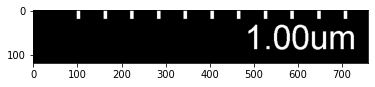

In [2]:
# Define the scale bar for all images in the directory 
img_1 = cv2.imread('img/1_1_q001.tif', cv2.IMREAD_GRAYSCALE)
thresh_row = cut_scale_bar(img_1)
length_pixel = dist_btw_scale_bar(thresh_row,255)
pixel_to_nm = translate_pixel_to_nm(length_pixel, 1E3)
print(pixel_to_nm)

In [3]:
directory = 'img/'

f_total = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        if f[-1] == "f":
            f_total.append(f)


len(f_total)

99

In [4]:
hole_density_map = {}
avg_diam_map = {}
avg_nn_dist_map = {}

for img in f_total:
    original_img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    cropped_image = original_img[0:1785, :]
    ret,thresh1 = cv2.threshold(cropped_image,80,255,cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8) 
    img_adaptive = cv2.erode(thresh1, kernel, iterations=2) 
    cluster_centers = find_clusters(img_adaptive)
    cluster_large_holes,num_holes = remove_small_holes(cluster_centers)
    cen_x,cen_y = annotate_image_with_labels(cluster_large_holes,original_img)

    # define hole density dict
    hole_density_map[img] = num_holes



    cluster_size = []
    diameter = []

    for label,coords in cluster_large_holes.items():
        cluster_size.append(len(cluster_large_holes[label])/pixel_to_nm**2)
        diameter.append(2*math.sqrt(len(cluster_large_holes[label])/pixel_to_nm**2/3.14))

    avg_diam = np.average(diameter)
    # define avg diameter dict
    avg_diam_map[img] = avg_diam


    avg_nn_dist = nearest_neighbour_dist(cen_x,cen_y,pixel_len=pixel_to_nm)
    # define avg nearest neighbour distance
    avg_nn_dist_map[img] = avg_nn_dist

    print(img + "is done!")
    
    







img/3_2_q013.tifis done!
img/1_2_q004.tifis done!
img/4_1_q005.tifis done!
img/4_1_q001.tifis done!
img/2_1_q014.tifis done!
img/4_4_q009.tifis done!
img/2_1_q015.tifis done!
img/4_1_q003.tifis done!
img/4_3_q005.tifis done!
img/3_2_q012.tifis done!
img/1_1_q002.tifis done!
img/2_3_q002.tifis done!
img/5_1_q002.tifis done!
img/5_4_q005.tifis done!
img/3_1_q008.tifis done!
img/1_2_q005.tifis done!
img/4_4_q006.tifis done!
img/1_3_q002.tifis done!
img/2_1_q013.tifis done!
img/4_3_q003.tifis done!
img/4_1_q004.tifis done!
img/3_2_q014.tifis done!
img/3_4_q004.tifis done!
img/4_1_q002.tifis done!
img/2_4_q001.tifis done!
img/3_4_q003.tifis done!
img/4_3_q002.tifis done!
img/3_1_q009.tifis done!
img/5_3_q004.tifis done!
img/3_3_q002.tifis done!
img/5_4_q004.tifis done!
img/5_2_q004.tifis done!
img/2_2_q001.tifis done!
img/1_4_q007.tifis done!
img/4_2_q004.tifis done!
img/3_4_q005.tifis done!
img/2_2_q002.tifis done!
img/3_2_q011.tifis done!
img/2_2_q003.tifis done!
img/5_3_q001.tifis done!


In [5]:
import json

json.dump(hole_density_map, open( "hole_density_map.json", 'w' ) )
json.dump(avg_diam_map, open( "avg_diam_map.json", 'w' ) )
json.dump(avg_nn_dist_map, open( "avg_nn_dist_map.json", 'w' ) )


In [9]:
hole_density_dict_norm = switch_filename_to_coord_tuple(hole_density_map)
avg_diam_dict_norm = switch_filename_to_coord_tuple(avg_diam_map)
avg_nn_dist_dict_norm = switch_filename_to_coord_tuple(avg_nn_dist_map)

hole_density_array = switch_dict_to_ndarray(hole_density_dict_norm)
avg_diam_array = switch_dict_to_ndarray(avg_diam_dict_norm)
avg_nn_dist_array = switch_dict_to_ndarray(avg_nn_dist_dict_norm)

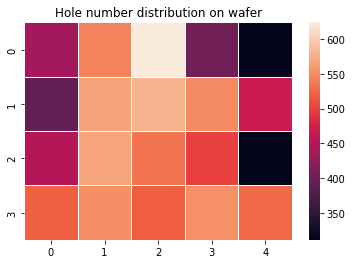

In [11]:
ax = sns.heatmap(hole_density_array, linewidth=1)
plt.title("Hole number distribution on wafer")
plt.show()

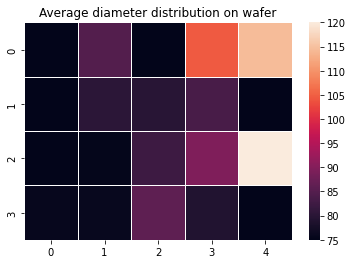

In [17]:
ax = sns.heatmap(avg_diam_array, linewidth=1,vmin=75,vmax=120)
plt.title("Average diameter distribution on wafer")
plt.show()

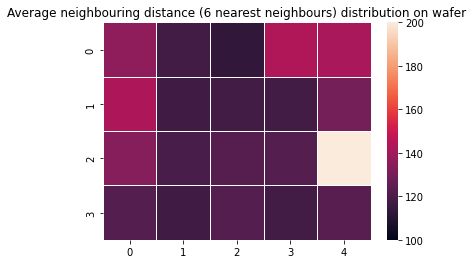

In [16]:
ax = sns.heatmap(avg_nn_dist_array, linewidth=1,vmin=100,vmax=200)
plt.title("Average neighbouring distance (6 nearest neighbours) distribution on wafer")
plt.show()